![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/finance-nlp/90.1.Visual_and_Textual_Classification.ipynb)

# Visual and Textual (Layout) Classification with Visual NLP

## Install johnsnowlabs





In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install -q johnsnowlabs

## Automatic Installation
Using my.johnsnowlabs.com SSO

In [1]:
from johnsnowlabs import nlp, finance, visual
# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
# nlp.install(force_browser=True, visual=True)

## Manual downloading
If you are not registered in my.johnsnowlabs.com, you received a license via e-email or you are using Safari, you may need to do a manual update of the license.

- Go to my.johnsnowlabs.com
- Download your license
- Upload it using the following command

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

- Install it

In [4]:
nlp.install()

👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_7187 (2).json
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up  John Snow Labs home in /root/.johnsnowlabs, this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_7187 (2).json
Installing /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.8-py3-none-any.whl to /usr/bin/python3
Installed 1 products:
💊 Spark-Healthcare==4.2.8 installed! ✅ Heal the planet with NLP! 


In [ ]:
! pip install -U Pillow==9.4.0

<b><h1><font color='darkred'>!!! ATTENTION !!! </font><h1><b>

<b>After running previous cell, <font color='darkred'>RESTART the COLAB RUNTIME </font> and go ahead.<b>

In [ ]:
import os
os.kill(os.getpid(), 9)

# Starting

In [ ]:
# Automatically load license data and start a session with all jars user has access to
from johnsnowlabs import nlp, finance, visual
spark = nlp.start(visual=True)

## **Classify Visual Finance Documents**

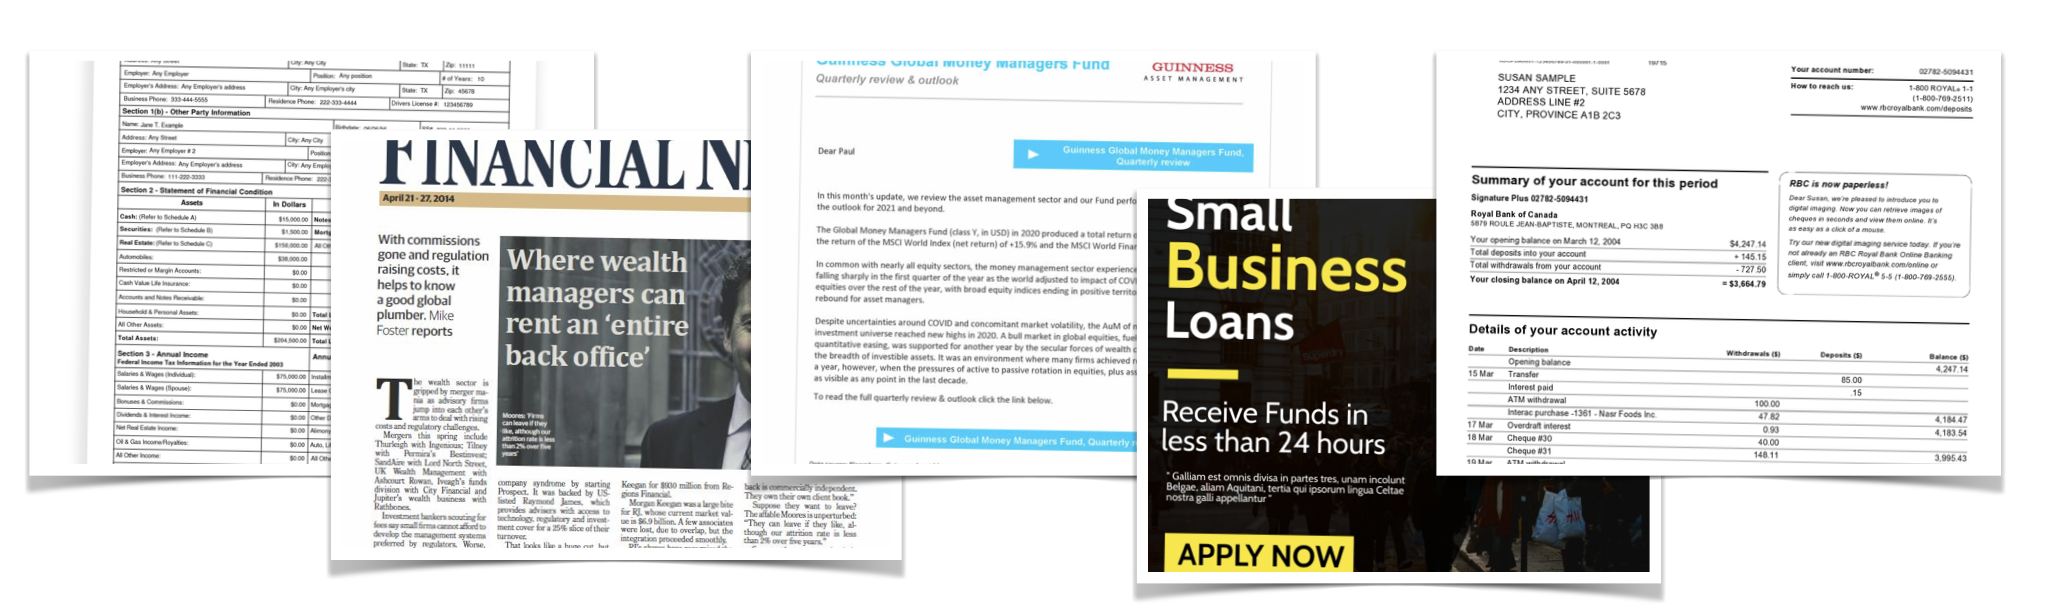

🔎 Document Image Transformer (DiT) model for document classification. The model was pretrained on IIT-CDIP dataset that includes 42 million document images and finetuned on RVL-CDIP dataset that consists of 400 000 grayscale images in 16 classes.

🔎With this model, you can classify financial documents using text and layout data with new features offered by Spark OCR.

🔎Classes detected by the model:

* `letter` 
* `form` 
* `email` 
* `handwritten`
* `advertisement` 
* `scientific report`
* `scientific publicatio`
* `specification`
* `file folder`
* `news article`
* `budget`
* `invoice`
* `presentation`
* `questionnaire`
* `resume` 
* `memo`




## Load test images

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/finance-nlp/data/visual_document_sample_images/Document_advertisement1.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/finance-nlp/data/visual_document_sample_images/Document_invoice.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/finance-nlp/data/visual_document_sample_images/Document_advertisement2.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/finance-nlp/data/visual_document_sample_images/Document_budget.png
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/finance-nlp/data/visual_document_sample_images/Document_email.png

In [ ]:
sample_images = spark.read.format("binaryFile").load("*.png").cache()
sample_images.show()

# Display images

In [ ]:
image_df = visual.BinaryToImage().transform(sample_images)
visual.display_images(image_df)

# Define pipeline

In [ ]:
# from sparkocr.utils import get_vocabulary_dict

binary_to_image = visual.BinaryToImage()\
    .setOutputCol("image") \
    .setImageType(visual.ImageType.TYPE_3BYTE_BGR)

doc_class = visual.VisualDocumentClassifierV3() \
    .pretrained("dit_base_finetuned_rvlcdip", "en", "clinical/ocr") \
    .setInputCols(["image"])\
    .setOutputCol("label")

pipeline = nlp.PipelineModel(stages=[binary_to_image,
                                 doc_class])

# Call pipeline

In [ ]:
results = pipeline.transform(sample_images).cache()

# Show results

In [ ]:
results

image,path,modificationTime,length,pagenum,label,exception
{file:/content/Do...,file:/content/Doc...,2023-01-20 09:08:...,239989,0,advertisement,null
{file:/content/Do...,file:/content/Doc...,2023-01-20 09:08:...,93146,0,email,null


In [ ]:
results.select("image", "label")

image,label
{file:/content/Do...,advertisement
{file:/content/Do...,email


 
 CLASS: email

    Image #0:
    Origin: file:/content/Document_email.png
    Resolution: 300 dpi
    Width: 700 px
    Height: 900 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


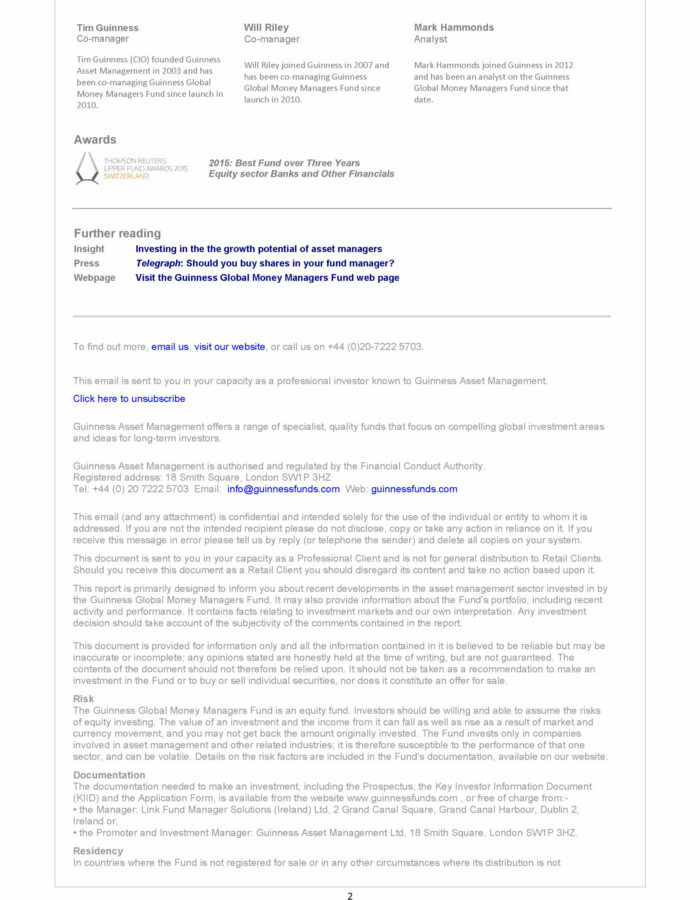

 
 CLASS: advertisement

    Image #0:
    Origin: file:/content/Document_advertisement2.png
    Resolution: 72 dpi
    Width: 1080 px
    Height: 1920 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


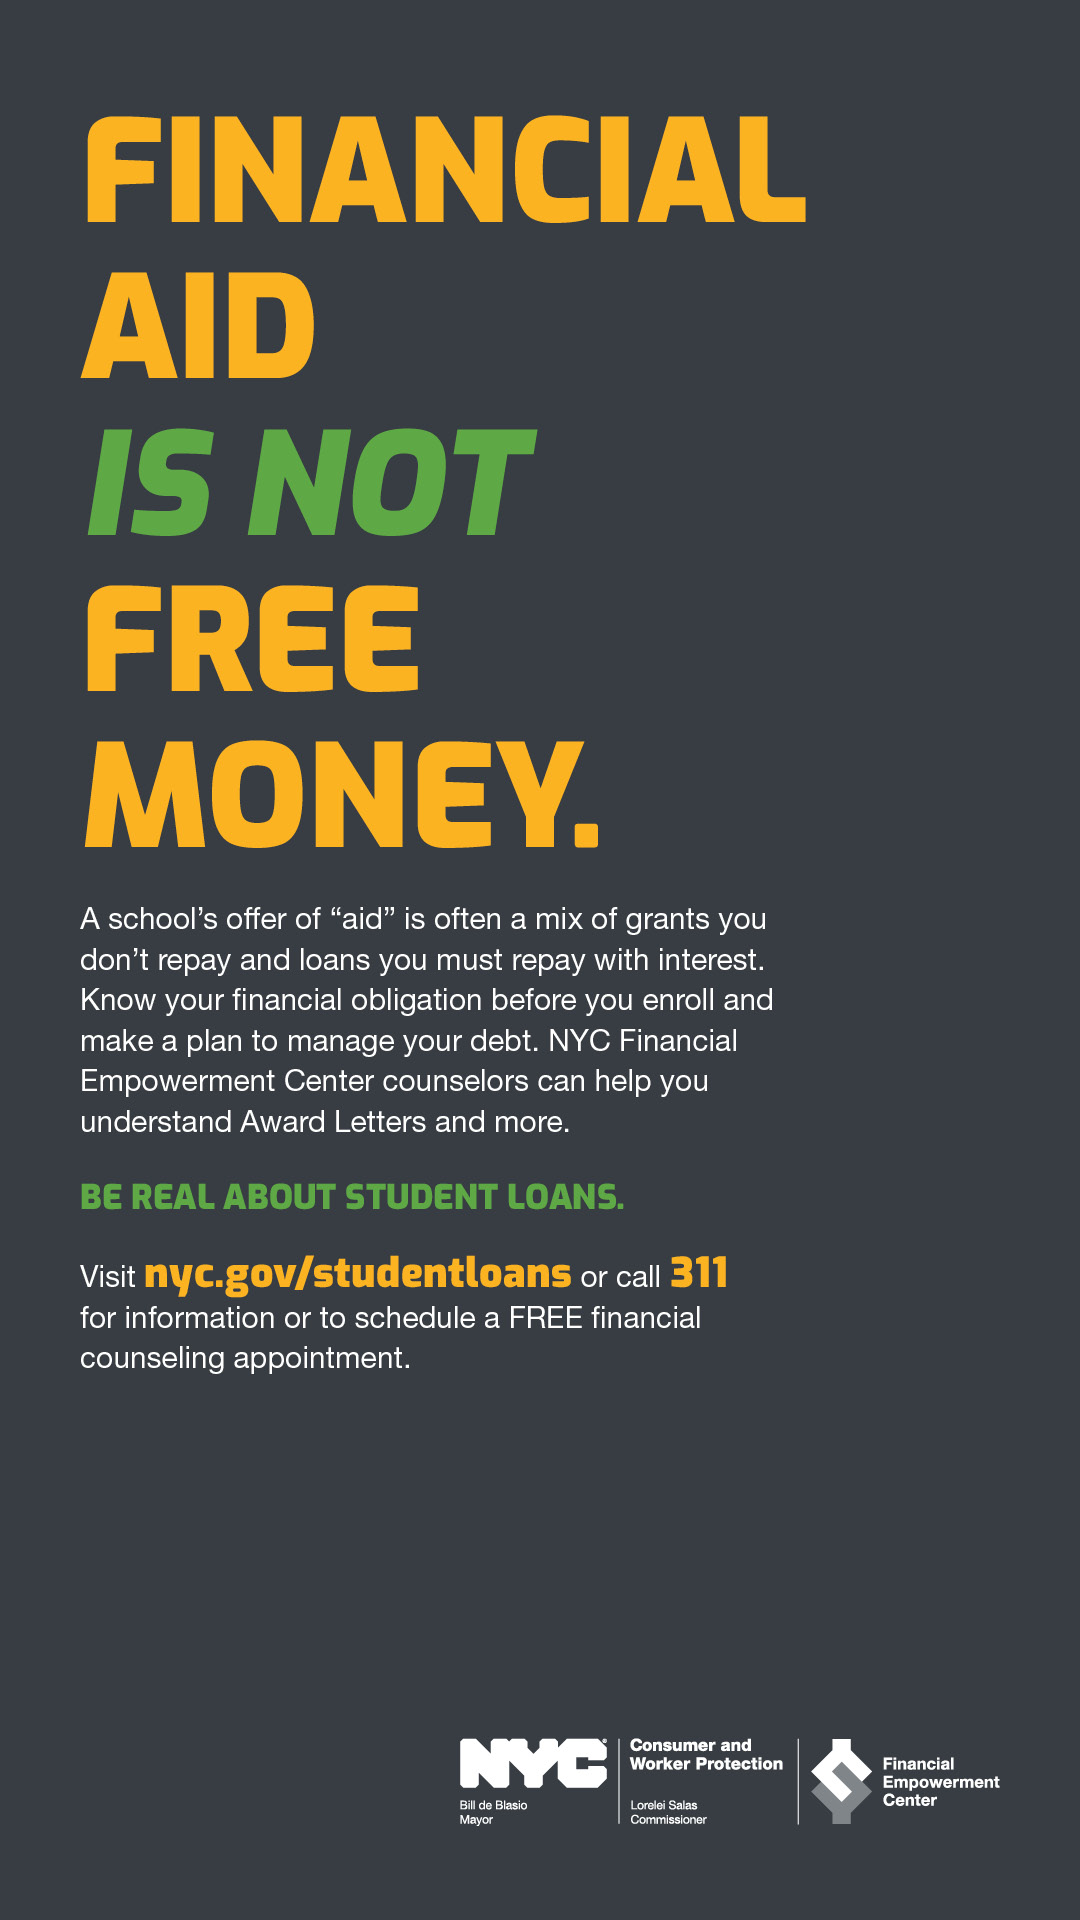

In [ ]:
for r in results.distinct().collect():
    print(f"\033[1;32m \n CLASS: {r.label}")
    visual.display_image(r.image)
    
  